In [212]:
# usual imports
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#trying something new - for greater accuracy(?) or ordinal regression 
from mord import LogisticAT

# warnings
import warnings
warnings.filterwarnings('ignore')

In [213]:
df = pd.read_csv('../Resources/AI_Impact_On_Jobs_2030_piped.csv')

In [214]:
ml_df = df.copy()

In [215]:
ml_df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Experience_Band_Code,Income_Band,Income_Band_Code,Job_Sector,Job_Sector_Code,Labour_Group,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,4,Middle,1,Security & Protective Services,0,Manual_Trade_Service,0,2.0,2.0,0
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,4,High,2,Research & Development,1,Digital_Creative,1,0.0,3.0,1
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,1,High,2,Construction,2,Manual_Trade_Service,0,2.0,0.0,2
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,3,High,2,Digital & Technology,3,Digital_Creative,1,1.0,3.0,3
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,4,Middle,1,Finance & Professional Services,4,Private_Professional,2,1.0,0.0,4


In [216]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [217]:
ml_df[['Income_Band_Code', 'Income_Band']].value_counts(sort=True)

Income_Band_Code  Income_Band
1                 Middle         1742
2                 High           1247
0                 Low              11
Name: count, dtype: int64

In [218]:
ml_df[['Experience_Band', 'Experience_Band_Code']].value_counts(sort=True)

Experience_Band  Experience_Band_Code
Expert/Late      4                       1032
Senior           3                        983
Mid-Level        2                        486
Early Career     1                        301
Entry/Junior     0                        198
Name: count, dtype: int64

In [219]:
ml_df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Experience_Band_Code,Income_Band,Income_Band_Code,Job_Sector,Job_Sector_Code,Labour_Group,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,4,Middle,1,Security & Protective Services,0,Manual_Trade_Service,0,2.0,2.0,0
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,4,High,2,Research & Development,1,Digital_Creative,1,0.0,3.0,1
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,1,High,2,Construction,2,Manual_Trade_Service,0,2.0,0.0,2
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,3,High,2,Digital & Technology,3,Digital_Creative,1,1.0,3.0,3
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,4,Middle,1,Finance & Professional Services,4,Private_Professional,2,1.0,0.0,4


In [220]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [221]:
ml_df[['Job_Sector','Job_Sector_Code']].value_counts(sort=True)

Job_Sector                         Job_Sector_Code
Digital & Technology               3                  482
Health & Social Care               13                 274
Digital & Creative Industries      9                  167
Education                          6                  166
Creative Industries                11                 160
Business & Professional Services   7                  157
Construction                       2                  156
Retail & Consumer Services         12                 155
Security & Protective Services     0                  154
Transport & Logistics              14                 153
Finance & Professional Services    4                  151
Research & Development             1                  149
Hospitality & Catering             15                 141
Transport & Automotive Services    5                  136
Marketing & Professional Services  16                 134
Customer Service                   8                  133
Legal Services       

In [222]:
ml_df[['Labour_Group','Labour_Group_Code']].value_counts(sort=True)

Labour_Group          Labour_Group_Code
Manual_Trade_Service  0                    1028
Digital_Creative      1                     958
Private_Professional  2                     574
Public_Sector         3                     440
Name: count, dtype: int64

In [223]:
ml_df[['Risk_Category','Risk_Category_Code']].value_counts(sort=True)

Risk_Category  Risk_Category_Code
Medium         1.0                   1521
High           2.0                    740
Low            0.0                    739
Name: count, dtype: int64

In [224]:
ml_df[['Job_Title','Job_Title_Code']].value_counts(sort=True)

Job_Title            Job_Title_Code
Software Engineer    3                 175
Data Scientist       12                167
UX Researcher        10                167
Teacher              7                 166
Graphic Designer     13                160
HR Specialist        8                 157
Construction Worker  2                 156
Retail Worker        14                155
Security Guard       0                 154
Truck Driver         16                153
Financial Analyst    4                 151
Research Scientist   1                 149
Nurse                18                142
Chef                 17                141
AI Engineer          5                 140
Mechanic             6                 136
Marketing Manager    19                134
Customer Support     9                 133
Lawyer               11                132
Doctor               15                132
Name: count, dtype: int64

In [225]:
ml_df[['Education_Level','Education_Level_Code']].value_counts(sort=True)

Education_Level  Education_Level_Code
High School      0.0                     784
Bachelor's       1.0                     765
Master's         2.0                     735
PhD              3.0                     716
Name: count, dtype: int64

In [226]:
ml_df_num = ml_df.select_dtypes(include=['number'])

In [227]:
ml_df_num.head()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Skill_8,Skill_9,Skill_10,Experience_Band_Code,Income_Band_Code,Job_Sector_Code,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code
0,45795,28,0.18,1.28,0.85,0.45,0.10,0.46,0.33,0.14,...,0.72,0.94,0.00,4,1,0,0,2.0,2.0,0
1,133355,20,0.62,1.11,0.05,0.02,0.52,0.40,0.05,0.97,...,0.62,0.38,0.98,4,2,1,1,0.0,3.0,1
2,146216,2,0.86,1.18,0.81,0.01,0.94,0.56,0.39,0.02,...,0.68,0.61,0.83,1,2,2,0,2.0,0.0,2
3,136530,13,0.39,0.68,0.60,0.43,0.21,0.57,0.03,0.84,...,0.93,0.73,0.33,3,2,3,1,1.0,3.0,3
4,70397,22,0.52,1.46,0.64,0.75,0.54,0.59,0.97,0.61,...,0.17,0.02,0.42,4,1,4,2,1.0,0.0,4


In [228]:
ml_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Average_Salary               3000 non-null   int64  
 1   Years_Experience             3000 non-null   int64  
 2   AI_Exposure_Index            3000 non-null   float64
 3   Tech_Growth_Factor           3000 non-null   float64
 4   Automation_Probability_2030  3000 non-null   float64
 5   Skill_1                      3000 non-null   float64
 6   Skill_2                      3000 non-null   float64
 7   Skill_3                      3000 non-null   float64
 8   Skill_4                      3000 non-null   float64
 9   Skill_5                      3000 non-null   float64
 10  Skill_6                      3000 non-null   float64
 11  Skill_7                      3000 non-null   float64
 12  Skill_8                      3000 non-null   float64
 13  Skill_9           

In [229]:
X = ml_df_num.drop(['Risk_Category_Code', 'Automation_Probability_2030'], axis=1)
y = ml_df_num['Risk_Category_Code']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y, 
                                                     test_size=0.2, 
                                                     stratify=y, 
                                                     random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [231]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'multinomial'


In [232]:
preds = model.predict(X_test_scaled)
probs = model.predict_proba(X_test_scaled)
print(classification_report(y_test, preds, target_names=['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       0.63      0.58      0.60       148
      medium       0.74      0.66      0.70       304
        high       0.73      0.93      0.82       148

    accuracy                           0.71       600
   macro avg       0.70      0.72      0.71       600
weighted avg       0.71      0.71      0.70       600



In [233]:
y_train_int = y_train.astype(int) #convert to integer type for mord as it cannot process float64 type as a target

model = LogisticAT(alpha=1.0, max_iter=100) 
model.fit(X_train_scaled, y_train_int)

preds = model.predict(X_test_scaled)
print(classification_report(y_test, preds, target_names=['low', 'medium', 'high']))

preds_cumulative = model.predict(X_test_scaled) 

              precision    recall  f1-score   support

         low       0.77      0.58      0.66       148
      medium       0.69      0.75      0.72       304
        high       0.68      0.73      0.71       148

    accuracy                           0.70       600
   macro avg       0.72      0.69      0.70       600
weighted avg       0.71      0.70      0.70       600



In [234]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [235]:
y_pred = rf_baseline.predict(X_test)

In [236]:
accuracy = accuracy_score(y_test, y_pred)

In [237]:
accuracy * 100

99.33333333333333

In [238]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       1.00      0.99      0.99       148
      medium       0.99      0.99      0.99       304
        high       0.99      1.00      0.99       148

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



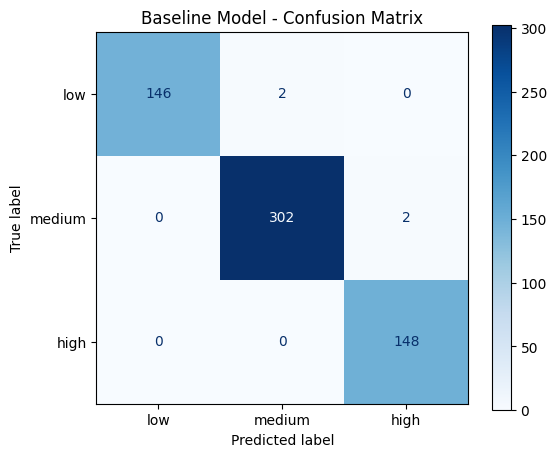

In [239]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(ax=ax, cmap='Blues')
plt.title('Baseline Model - Confusion Matrix')
plt.show()

In [240]:
rf_baseline.feature_importances_

array([0.01465239, 0.0101486 , 0.01327073, 0.01202101, 0.01220711,
       0.01245844, 0.01339501, 0.01264929, 0.01383481, 0.01271263,
       0.01267555, 0.01250369, 0.0128284 , 0.01291466, 0.00384046,
       0.00146007, 0.20479555, 0.37033475, 0.00411033, 0.23718652])

In [241]:
X_encoded = X.copy()
X_encoded.columns

Index(['Average_Salary', 'Years_Experience', 'AI_Exposure_Index',
       'Tech_Growth_Factor', 'Skill_1', 'Skill_2', 'Skill_3', 'Skill_4',
       'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8', 'Skill_9', 'Skill_10',
       'Experience_Band_Code', 'Income_Band_Code', 'Job_Sector_Code',
       'Labour_Group_Code', 'Education_Level_Code', 'Job_Title_Code'],
      dtype='object')

In [242]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_baseline.feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

In [243]:
feature_importance

,feature,importance
17,Labour_Group_Code,0.370335
19,Job_Title_Code,0.237187
16,Job_Sector_Code,0.204796
0,Average_Salary,0.014652
8,Skill_5,0.013835
6,Skill_3,0.013395
2,AI_Exposure_Index,0.013271
13,Skill_10,0.012915
12,Skill_9,0.012828
9,Skill_6,0.012713


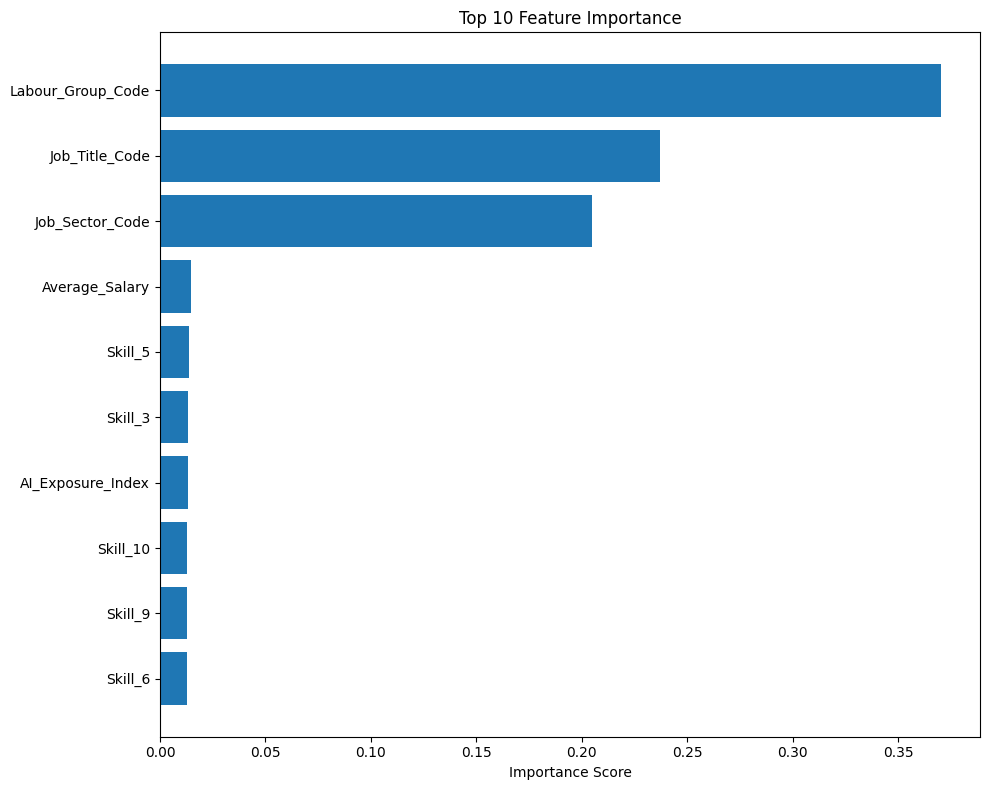

In [244]:
# Visualise feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [245]:
# Select top features
top_n = 3
selected_features = feature_importance.head(top_n)['feature'].tolist()

selected_features

['Labour_Group_Code', 'Job_Title_Code', 'Job_Sector_Code']

In [246]:
# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [247]:
accuracy_selected * 100

99.33333333333333

In [248]:
(accuracy_selected - accuracy) * 100

0.0

In [249]:
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV

# Define parameter grid (simple)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [250]:
# Grid search with cross-validation
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid, param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [251]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [252]:
grid_search.best_score_

np.float64(0.9929166666666667)

In [253]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [254]:
accuracy

0.9933333333333333

In [255]:
accuracy_selected

0.9933333333333333

In [256]:
accuracy_best

0.9933333333333333

In [257]:
(accuracy_best - accuracy)*100

0.0

In [258]:
print(classification_report(y_test, y_pred_best, target_names= ['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       1.00      0.99      0.99       148
      medium       0.99      0.99      0.99       304
        high       0.99      1.00      0.99       148

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



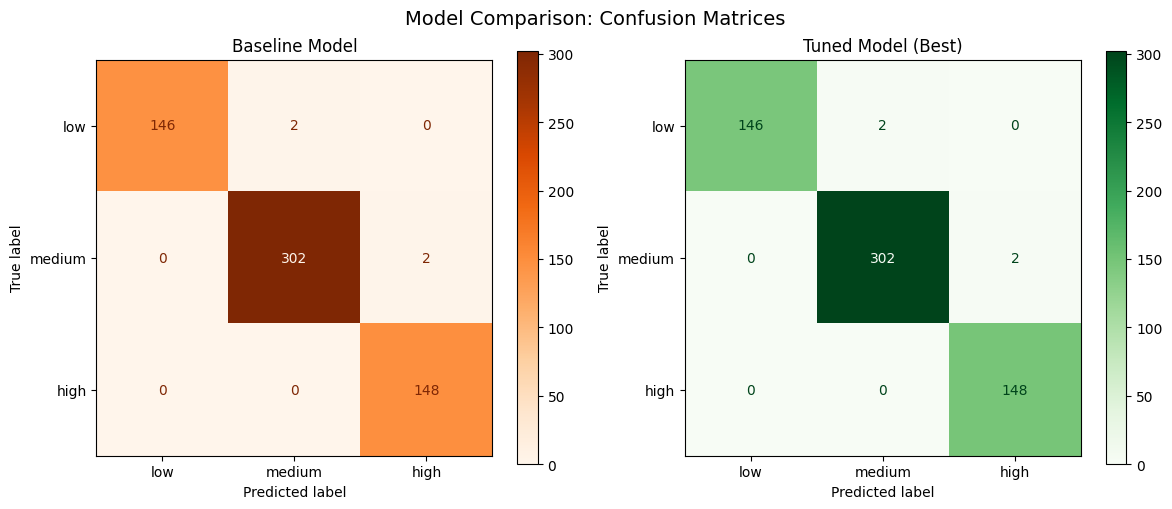

In [259]:
# Final confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
cm_baseline = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, 
                                display_labels=['low', 'medium', 'high'])
disp1.plot(ax=axes[0], cmap='Oranges')
axes[0].set_title('Baseline Model')

# Best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_best, 
                                display_labels=['low', 'medium', 'high'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Tuned Model (Best)')

plt.suptitle('Model Comparison: Confusion Matrices', fontsize=14)
plt.tight_layout()
plt.show()

In [260]:
# Feature importance from best model
final_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_model.feature_importances_
})
final_importance = final_importance.sort_values('importance', ascending=False)
final_importance

,feature,importance
0,Labour_Group_Code,0.384919
1,Job_Title_Code,0.360824
2,Job_Sector_Code,0.254257
